In [1]:
import json
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import scipy.io as sio
%matplotlib notebook

In [2]:
pascal_baseline = {}
pascal_results = {}
memorability_baseline = {}
memorability_results = {}

with open("./data/baseline/specificity_pascal.json", 'r') as infile:
    pascal_baseline = json.load(infile)
    
with open("./data/baseline/specificity_memorability.json", 'r') as infile:
    memorability_baseline = json.load(infile)
    
with open("./data/results/pascal_results.json", 'r') as infile:
    pascal_results = json.load(infile)
    
with open("./data/results/memorability_results.json", 'r') as infile:
    memorability_results = json.load(infile)

In [3]:
p_base_df = pd.DataFrame(pascal_baseline).transpose().rename(
    columns={
        "B0": "base_min",
        "B1": "base_max",
        "mean": "base_mean",        
    }
)

In [4]:
p_results_df = pd.DataFrame(pascal_results).transpose().rename(
    columns = {
        "Captions": "result_captions",
        "maxScore": "result_max",
        "minScore": "result_min",
        "meanScore": "result_mean",
    }
)

In [5]:
pascal_df = p_base_df.copy(deep=True).join(p_results_df)

In [6]:
pascal_sorted_base = pascal_df.sort_values("base_mean")

In [7]:
stats.spearmanr(pascal_sorted_base["base_mean"], pascal_sorted_base["result_mean"])

SpearmanrResult(correlation=0.01641955641955642, pvalue=0.6040274948369848)

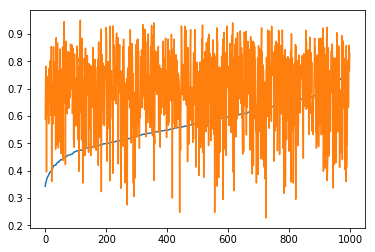

In [8]:
plt.plot(pascal_sorted_base['base_mean'].values)
plt.plot(pascal_sorted_base['result_mean'].values)

In [9]:
mauto_mat = sio.loadmat("./data/baseline/specificity_automated.mat")

In [10]:
mauto = [i for i in mauto_mat['specificity_automated'][0]]

In [11]:
mbs = [memorability_baseline[img]['mean'] for img in sorted(memorability_baseline.keys())]

In [12]:
mres = [memorability_results[img]['meanScore'] for img in sorted(memorability_results.keys())]

In [13]:
stats.spearmanr(mbs, mauto)

SpearmanrResult(correlation=0.9519834408248864, pvalue=0.0)

In [14]:
stats.spearmanr(mbs, mres)

SpearmanrResult(correlation=0.017607790570710793, pvalue=0.6002772277935496)

In [15]:
memo=pd.DataFrame()

In [16]:
memo['base'] = mbs
memo['result'] = mres
memo['auto'] = mauto

In [17]:
memo_sort = memo.sort_values('base')

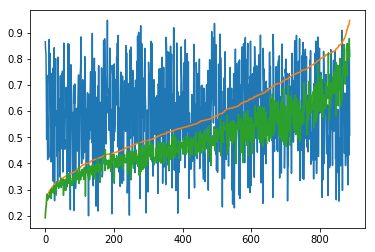

In [18]:
plt.plot(memo_sort['result'].values)
plt.plot(memo_sort['base'].values)
plt.plot(memo_sort['auto'].values)